In [1]:
from sympy import init_session
from sympy.parsing.latex import parse_latex
from sympy.parsing.sympy_parser import parse_expr
from sympy.functions.combinatorial.numbers import nC, nP, nT
from IPython.display import Markdown as md
from IPython.display import display
import pandas as pd

from sympy import solve_poly_inequality, reduce_abs_inequality
from sympy.solvers.inequalities import solve_univariate_inequality, reduce_rational_inequalities

init_session()

a, b, c, d = symbols('a b c d', real = True)
from docparts import añadir_ejercicios, doc_ejer, escribir_preambulo, escribir_ejercicios, escribir_fin

df_ejercicios = pd.DataFrame()

fichero = 'autoev12'
titulo = 'Autoevaluación 2 ev1'
curso = '1BC'


IPython console for SymPy 1.2 (Python 3.6.5-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.2/



In [2]:
def simbolo (operacion):
    if operacion == '<=' :
        return('\leq')
    elif operacion == '>=' :
        return('\geq')
    else :
        return(operacion)

In [3]:
def sol_sist(sist):
    # Función que recibe un sistema de ecuaciones en Latex y devuelve: 
    # El sistema en latex, la lista de exuaciones sympy, la solución y la matriz de ecuacuibes
    
    sist_latex = r"""\left\{\begin{matrix}"""
    eq = []
    sb = EmptySet() # variables de las ecuaciones
    
    for i,e in enumerate(sist):
        sist_latex = sist_latex + e + r'\\ '
        eq.append(Eq(parse_latex(e[:e.find('=')]),parse_latex(e[e.find('=')+1:])).simplify())
        sb = parse_latex(e[:e.find('=')]).free_symbols.union(sb)
        sb = parse_latex(e[e.find('=')+1:]).free_symbols.union(sb)
        
       

    sist_latex = sist_latex + r'\end{matrix}\right.'
    
    matriz = linear_eq_to_matrix(eq,list(sb))
    matriz = matriz[0].row_join(matriz[1])
    
    return [sist_latex, eq, solve(eq), matriz]    

In [4]:
# Página 15 ejercicio 9

texto_ejercicio = 'Efectúa simplificando el resultado si es posible:'
n_ejercicio = 'p015e09'

display(md("**"+texto_ejercicio+"**"))

enunciado_latex = [r'\frac{\frac{x^2+2x+1}{x - 3}}{\frac{x+1}{x^2 -9 }}',
                   r'\frac{3x^2+1}{x^2+x}  - \frac{2x}{x+1}',
                   r'\frac{\frac{x^2-2x+1}{x + 3}}{\frac{x-1}{x^2 -9 }}',
                   r'\frac{3x^2+1}{x^2+x}  - \frac{2x}{x+1}',
                   r'\frac{1}{x^2-x} + \frac{2x-1}{x-1} - \frac{3x-1}{x}',
                   r'\frac{x}{{1 + \frac{1}{{1 + \frac{1}{x}}}}}',
                   r'\frac{{\frac{x}{{x - 2}} - \frac{x}{{x + 2}}}}{{1 - \frac{4}{{{x^2} - 4}}}}',
                   r'\frac{1}{{\frac{{x + 1}}{{x - 1}} - \frac{{x - 1}}{{x + 1}}}}',
                   r'( {{x^3} + x} )\cdot( {1 - \frac{{2x}}{{2x + \frac{2}{x}}}})',
                   r'( {\frac{1}{x} - \frac{1}{{x + 1}}})( {x - \frac{{x + 1}}{{x - 1}}})',
                   r'\frac{1}{x}( {\frac{2}{x} - \frac{3x}{{x + 1}}} ) - \frac{{x}}{x-1}( {3 - \frac{4}{{x + 1}}} )',
                   r'\frac{{\frac{{x - 1}}{{x + 2}} - \frac{{x + 2}}{{x - 1}}}}{{1 - \frac{1}{{x - 1}}}}'                 
                  ]




enunciado, solucion = [], []

for i, s in enumerate(enunciado_latex) : 
    enunciado.append(parse_latex(s))
    solucion.append(latex(cancel(parse_latex(s), domain = 'QQ<sqrt(2)>'))) 
    display(md("$"+ s +" \\rightarrow " + solucion[i] +"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2'), ignore_index=True)


**Efectúa simplificando el resultado si es posible:**

$\frac{\frac{x^2+2x+1}{x - 3}}{\frac{x+1}{x^2 -9 }} \rightarrow x^{2} + 4 x + 3$

$\frac{3x^2+1}{x^2+x}  - \frac{2x}{x+1} \rightarrow \frac{x^{2} + 1}{x^{2} + x}$

$\frac{\frac{x^2-2x+1}{x + 3}}{\frac{x-1}{x^2 -9 }} \rightarrow x^{2} - 4 x + 3$

$\frac{3x^2+1}{x^2+x}  - \frac{2x}{x+1} \rightarrow \frac{x^{2} + 1}{x^{2} + x}$

$\frac{1}{x^2-x} + \frac{2x-1}{x-1} - \frac{3x-1}{x} \rightarrow - \frac{x - 3}{x - 1}$

$\frac{x}{{1 + \frac{1}{{1 + \frac{1}{x}}}}} \rightarrow \frac{x^{2} + x}{2 x + 1}$

$\frac{{\frac{x}{{x - 2}} - \frac{x}{{x + 2}}}}{{1 - \frac{4}{{{x^2} - 4}}}} \rightarrow \frac{4 x}{x^{2} - 8}$

$\frac{1}{{\frac{{x + 1}}{{x - 1}} - \frac{{x - 1}}{{x + 1}}}} \rightarrow \frac{x^{2} - 1}{4 x}$

$( {{x^3} + x} )\cdot( {1 - \frac{{2x}}{{2x + \frac{2}{x}}}}) \rightarrow x$

$( {\frac{1}{x} - \frac{1}{{x + 1}}})( {x - \frac{{x + 1}}{{x - 1}}}) \rightarrow \frac{x^{2} - 2 x - 1}{x^{3} - x}$

$\frac{1}{x}( {\frac{2}{x} - \frac{3x}{{x + 1}}} ) - \frac{{x}}{x-1}( {3 - \frac{4}{{x + 1}}} ) \rightarrow - \frac{3 x^{4} + 2 x^{3} - 5 x^{2} + 2}{x^{4} - x^{2}}$

$\frac{{\frac{{x - 1}}{{x + 2}} - \frac{{x + 2}}{{x - 1}}}}{{1 - \frac{1}{{x - 1}}}} \rightarrow - \frac{6 x + 3}{x^{2} - 4}$

In [5]:
# Página 21 ejercicio 23

texto_ejercicio = 'Resuelve los sistemas:'
n_ejercicio = 'p021e23'

display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [[r'2x-y+2z=1',r'x+y-z = 3', r'3x+2y+z =  5'],
                       [r'x - y + z = 1',r'2x + y - 2z = 2', r'x+2y-3z = 1'],
                       [r'x+y+z=1',r'x + 2y - z = 2', r'2x +3y = 4'],
                       [r'x+y+z=1',r'x + 2y - z = 2', r'2x +3y = 3'],
                       [r'\frac{x}{2} + \frac{y}{3} + z = -\frac{1}{2}',r'x - \frac{y}{2} + \frac{z}{3} = -1', r' \frac{x}{3} - y - \frac{z}{2} = -\frac{1}{6}'],
                       [r'\frac{x}{2} + \frac{y}{3} + \frac{z}{3} = -2',r'\frac{x}{3} - \frac{y}{2} + \frac{z}{3} = 2', r'\frac{x}{6} + \frac{y}{2} + \frac{z}{2} = 1'],
                       [r'x - y + z = 5',r'\frac{{x - 1}}{2} + \frac{y}{3} = 1', r'\frac{{2x + y}}{2} - \frac{{3z + y}}{3} = 4']
                       
                      ]




enunciado_latex,enunciado, solucion = [], [], []

for i, s in enumerate(pre_enunciado_latex) :
    enl, en , so, mat = sol_sist(s)
    enunciado_latex.append(enl)
    enunciado.append(en)
    so_l=latex(mat.LUdecomposition()[1])+ r' \rightarrow  \\ '+latex(so)
    solucion.append(so_l) 
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + solucion[i] +"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2'), ignore_index=True)


**Resuelve los sistemas:**

$\left\{\begin{matrix}2x-y+2z=1\\ x+y-z = 3\\ 3x+2y+z =  5\\ \end{matrix}\right. \rightarrow \left[\begin{matrix}2 & 2 & -1 & 1\\0 & 2 & \frac{1}{2} & \frac{7}{2}\\0 & 0 & 2 & 1\end{matrix}\right] \rightarrow  \\ \left \{ x : \frac{13}{8}, \quad y : \frac{1}{2}, \quad z : - \frac{7}{8}\right \}$

$\left\{\begin{matrix}x - y + z = 1\\ 2x + y - 2z = 2\\ x+2y-3z = 1\\ \end{matrix}\right. \rightarrow \left[\begin{matrix}1 & 1 & -1 & 1\\0 & 4 & -1 & 4\\0 & 0 & 0 & 0\end{matrix}\right] \rightarrow  \\ \left \{ x : \frac{z}{3} + 1, \quad y : \frac{4 z}{3}\right \}$

$\left\{\begin{matrix}x+y+z=1\\ x + 2y - z = 2\\ 2x +3y = 4\\ \end{matrix}\right. \rightarrow \left[\begin{matrix}1 & 1 & 1 & 1\\0 & 2 & 3 & 3\\0 & 0 & 0 & 1\end{matrix}\right] \rightarrow  \\ \left [ \right ]$

$\left\{\begin{matrix}x+y+z=1\\ x + 2y - z = 2\\ 2x +3y = 3\\ \end{matrix}\right. \rightarrow \left[\begin{matrix}1 & 1 & 1 & 1\\0 & 2 & 3 & 3\\0 & 0 & 0 & 0\end{matrix}\right] \rightarrow  \\ \left \{ x : - 3 z, \quad y : 2 z + 1\right \}$

$\left\{\begin{matrix}\frac{x}{2} + \frac{y}{3} + z = -\frac{1}{2}\\ x - \frac{y}{2} + \frac{z}{3} = -1\\  \frac{x}{3} - y - \frac{z}{2} = -\frac{1}{6}\\ \end{matrix}\right. \rightarrow \left[\begin{matrix}1 & \frac{1}{2} & \frac{1}{3} & - \frac{1}{2}\\0 & \frac{5}{6} & - \frac{11}{18} & - \frac{5}{6}\\0 & 0 & - \frac{73}{180} & \frac{1}{6}\end{matrix}\right] \rightarrow  \\ \left \{ x : - \frac{95}{73}, \quad y : - \frac{30}{73}, \quad z : \frac{21}{73}\right \}$

$\left\{\begin{matrix}\frac{x}{2} + \frac{y}{3} + \frac{z}{3} = -2\\ \frac{x}{3} - \frac{y}{2} + \frac{z}{3} = 2\\ \frac{x}{6} + \frac{y}{2} + \frac{z}{2} = 1\\ \end{matrix}\right. \rightarrow \left[\begin{matrix}\frac{1}{3} & \frac{1}{2} & \frac{1}{3} & -2\\0 & - \frac{1}{6} & - \frac{5}{6} & 4\\0 & 0 & \frac{35}{12} & -10\end{matrix}\right] \rightarrow  \\ \left \{ x : - \frac{48}{7}, \quad y : - \frac{24}{7}, \quad z : \frac{54}{7}\right \}$

$\left\{\begin{matrix}x - y + z = 5\\ \frac{{x - 1}}{2} + \frac{y}{3} = 1\\ \frac{{2x + y}}{2} - \frac{{3z + y}}{3} = 4\\ \end{matrix}\right. \rightarrow \left[\begin{matrix}1 & 1 & -1 & 5\\0 & \frac{1}{2} & \frac{1}{3} & \frac{3}{2}\\0 & 0 & - \frac{13}{6} & 3\end{matrix}\right] \rightarrow  \\ \left \{ x : \frac{51}{13}, \quad y : - \frac{18}{13}, \quad z : - \frac{4}{13}\right \}$

In [6]:
# Página 20 ejercicio 2 a 16

texto_ejercicio = "Resuelve mediante expresiones algebraicas:"
n_ejercicio = 'p020e02-e16'

display(md("**"+texto_ejercicio+"**"))

sist = [ 
         [r'50=x+y',r'134=4x+2y'],
         [r'140=5x+10y',r'20=x+y'],
         [r'3105=45x+36y',r'84=x+y'],
         [r'\frac{2x}{3}=\frac{5y}{7}',r'x+26=2y'],
            
            ]

enunciado_latex, enunciado, solucion = [
   
    """En un corral hay conejos y gallinas, en total 50 cabezas y 134 patas. 
    ¿Cuántos animales hay de cada clase?""",
    """Se tienen 140 euros, en 20 billetes, unos de 5 euros y de 10 los restantes. 
    ¿Cuántos billetes hay de cada clase?""",
    """Un librero vendió 84 libros, unos a 45 euros y otros a 36 y obtuvo de la venta 3.105 euros. ¿Cuántos vendió de
cada clase?""",
    """En una clase los 2/3 del número de alumnas es igual a los 5/7 del número de alumnos. Si el número de
alumnas aumenta en 26, entonces es igual al doble del número de alumnos. ¿Cuántos alumnos y alumnas
tiene la clase?""",
    
    
    
                           ], [], []

for i, s in enumerate(sist) :
    enl, en , so, mat = sol_sist(s)
    enunciado.append(en)
    so_l= enl + r'  \rightarrow  \\'+latex(mat.LUdecomposition()[1])+ r' \rightarrow  '+latex(so)
    solucion.append(so_l) 
    display(md(enunciado_latex[i] +r"$ \ \\ " + r"  \rightarrow  " + solucion[i] +"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '1', enun_tex = False), ignore_index=True)


**Resuelve mediante expresiones algebraicas:**

En un corral hay conejos y gallinas, en total 50 cabezas y 134 patas. 
    ¿Cuántos animales hay de cada clase?$ \ \\   \rightarrow  \left\{\begin{matrix}50=x+y\\ 134=4x+2y\\ \end{matrix}\right.  \rightarrow  \\\left[\begin{matrix}1 & 1 & 50\\0 & 2 & 34\end{matrix}\right] \rightarrow  \left \{ x : 17, \quad y : 33\right \}$

Se tienen 140 euros, en 20 billetes, unos de 5 euros y de 10 los restantes. 
    ¿Cuántos billetes hay de cada clase?$ \ \\   \rightarrow  \left\{\begin{matrix}140=5x+10y\\ 20=x+y\\ \end{matrix}\right.  \rightarrow  \\\left[\begin{matrix}10 & 5 & 140\\0 & \frac{1}{2} & 6\end{matrix}\right] \rightarrow  \left \{ x : 12, \quad y : 8\right \}$

Un librero vendió 84 libros, unos a 45 euros y otros a 36 y obtuvo de la venta 3.105 euros. ¿Cuántos vendió de
cada clase?$ \ \\   \rightarrow  \left\{\begin{matrix}3105=45x+36y\\ 84=x+y\\ \end{matrix}\right.  \rightarrow  \\\left[\begin{matrix}36 & 45 & 3105\\0 & - \frac{1}{4} & - \frac{9}{4}\end{matrix}\right] \rightarrow  \left \{ x : 9, \quad y : 75\right \}$

En una clase los 2/3 del número de alumnas es igual a los 5/7 del número de alumnos. Si el número de
alumnas aumenta en 26, entonces es igual al doble del número de alumnos. ¿Cuántos alumnos y alumnas
tiene la clase?$ \ \\   \rightarrow  \left\{\begin{matrix}\frac{2x}{3}=\frac{5y}{7}\\ x+26=2y\\ \end{matrix}\right.  \rightarrow  \\\left[\begin{matrix}\frac{2}{3} & - \frac{5}{7} & 0\\0 & \frac{13}{14} & 26\end{matrix}\right] \rightarrow  \left \{ x : 30, \quad y : 28\right \}$

In [7]:
# Página 26 ejercicio 7



texto_ejercicio = 'Resuelve los siguientes sistemas de inecuaciones:'
n_ejercicio = 'p026e07'

display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [[r'\frac{{x - 1}}{2} - \frac{{x + 3}}{3} \leq x', r' \frac{{4x - 2}}{4} - \frac{{x - 1}}{3} \geq x'],
                       [r'{( {x - 1} )^2} - {( {x + 3} )^2} \leq 0', r'x - 3( {x - 1}^2 ) \leq 3 '],
                       [r'\frac{{3( {2 - x} )}}{2} - x < \frac{{16}}{3} - \frac{{x + 1}}{5} ', r'\frac{{x + 4}}{3} - \frac{{x - 5}}{6} > 3 - \frac{{2x - 3}}{{18}}']
                      ]
                       



enunciado_latex,enunciado, solucion = [], [], []

for i, s in enumerate(pre_enunciado_latex) :
    enl = r"""\left\{\begin{matrix}"""+ s[0] + r'\\' + s[1] + r"""\end{matrix}\right."""
    en = [parse_latex(s[0]), parse_latex(s[1])]
    so = reduce_rational_inequalities([en],x,relational=False)
    enunciado_latex.append(enl)
    enunciado.append(en)
    so_l=latex(so)
    solucion.append(so_l) 
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + solucion[i] +"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2'), ignore_index=True)


**Resuelve los siguientes sistemas de inecuaciones:**

$\left\{\begin{matrix}\frac{{x - 1}}{2} - \frac{{x + 3}}{3} \leq x\\ \frac{{4x - 2}}{4} - \frac{{x - 1}}{3} \geq x\end{matrix}\right. \rightarrow \left[- \frac{9}{5}, - \frac{1}{2}\right]$

$\left\{\begin{matrix}{( {x - 1} )^2} - {( {x + 3} )^2} \leq 0\\x - 3( {x - 1}^2 ) \leq 3 \end{matrix}\right. \rightarrow \left[-1, \infty\right)$

$\left\{\begin{matrix}\frac{{3( {2 - x} )}}{2} - x < \frac{{16}}{3} - \frac{{x + 1}}{5} \\\frac{{x + 4}}{3} - \frac{{x - 5}}{6} > 3 - \frac{{2x - 3}}{{18}}\end{matrix}\right. \rightarrow \left(\frac{18}{5}, \infty\right)$

**Resuelve los siguientes sistemas de inecuaciones:**

$\left\{\begin{matrix}x + y \leq 2 \\ - 2x + y \geq 4\\\end{matrix}\right. \rightarrow \\ \includegraphics[width=1\columnwidth]{si0}$

$\left\{\begin{matrix}2x - y < 1 \\ - x + 4y \geq  - 5\\\end{matrix}\right. \rightarrow \\ \includegraphics[width=1\columnwidth]{si1}$

$\left\{\begin{matrix}x - 2y > 3\\5x - 3y \leq 15\\\end{matrix}\right. \rightarrow \\ \includegraphics[width=1\columnwidth]{si2}$

$\left\{\begin{matrix}x \geq y \\x + y \geq 4\\x - 2y \leq 8\\\end{matrix}\right. \rightarrow \\ \includegraphics[width=1\columnwidth]{si3}$

$\left\{\begin{matrix}- 2 \leq x\\x \leq 2\\y \geq 4\\x + y - 1 \leq 0\\\end{matrix}\right. \rightarrow \\ \includegraphics[width=1\columnwidth]{si4}$

$\left\{\begin{matrix}x \geq 0 \\0 \leq y\\y \leq 3\\x - 2y \leq 10\\x + y \geq 10\\\end{matrix}\right. \rightarrow \\ \includegraphics[width=1\columnwidth]{si5}$

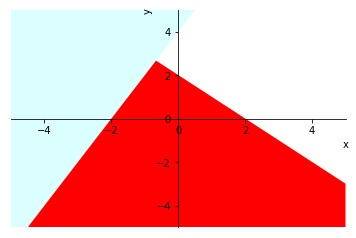

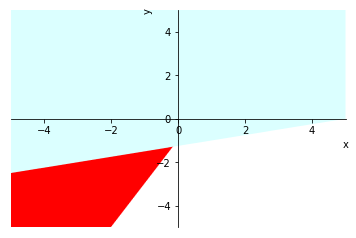

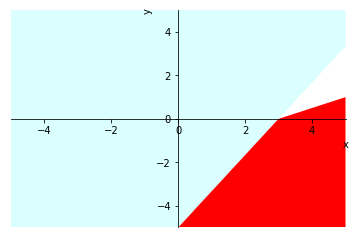

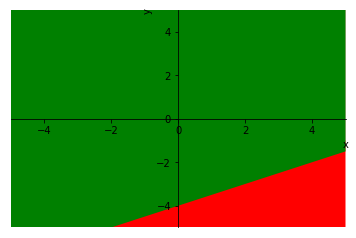

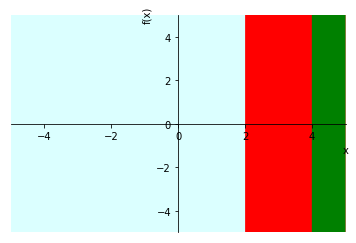

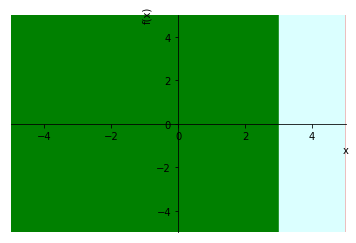

In [8]:
# Página 26 ejercicio 8

%matplotlib inline

texto_ejercicio = 'Resuelve los siguientes sistemas de inecuaciones:'
n_ejercicio = 'p026e08'

display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [[r'x + y \leq 2 ',r' - 2x + y \geq 4'],
                       [r'2x - y < 1 ',r' - x + 4y \geq  - 5'],
                       [r'x - 2y > 3', r'5x - 3y \leq 15'],
                       [r'x \geq y ', r'x + y \geq 4', r'x - 2y \leq 8'],
                       [r'- 2 \leq x', r'x \leq 2', r'y \geq 4', r'x + y - 1 \leq 0'],
                       [r'x \geq 0 ', r'0 \leq y', r'y \leq 3', r'x - 2y \leq 10', r'x + y \geq 10']
                       
                      ]
                       



enunciado_latex,enunciado, solucion = [], [], []

for i, s in enumerate(pre_enunciado_latex) :
    
    enl = r"""\left\{\begin{matrix}"""
    for j in s :
        enl = enl + j + r'\\' 
    enl = enl + r"""\end{matrix}\right."""
    en = [parse_latex(j) for j in s]
    p1 = plot_implicit(en[0], line_color='r', show=False, axis = True)
    p2 = plot_implicit(en[1], line_color = '#dbffff', show=False )
    p1.extend(p2)
    if(len(s)>2) :
        p3 = plot_implicit(en[2], line_color = 'g', show=False )
        p1.extend(p3)
    p1.save("../img/si"+str(i))
    so = r"\\ \includegraphics[width=1\columnwidth]{%s}" % ("si"+str(i))
    enunciado_latex.append(enl)
    enunciado.append(en)
    so_l=so
    solucion.append(so_l) 
    display(md("$"+ enunciado_latex[i] +" \\rightarrow " + solucion[i] +"$"))

df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '1', '2', sol_tex = False), ignore_index=True)


In [9]:
df_ejercicios.to_csv('ejercicios_auto12.csv', index = False)
df_ejercicios = pd.read_csv('ejercicios_auto12.csv', index_col= None)
escribir_preambulo(fichero, titulo)
for s in df_ejercicios.groupby('n_ejercicio').count().index : 
    display(md("**Ejercicio: **" + s ))
    display(df_ejercicios[df_ejercicios.n_ejercicio == s])
    escribir_ejercicios(df_ejercicios[df_ejercicios.n_ejercicio == s],fichero)

escribir_fin(fichero)

**Ejercicio: **p015e09

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
0,\frac{\frac{x^2+2x+1}{x - 3}}{\frac{x+1}{x^2 -...,((x**2 + 2*x + 1)/(x - 3))/(((x + 1)/(x**2 - 9))),x^{2} + 4 x + 3,Efectúa simplificando el resultado si es posible:,1BC,Autoevaluación 2 ev1,p015e09,1,2,1,True,True
1,\frac{3x^2+1}{x^2+x} - \frac{2x}{x+1},-2*x/(x + 1) + (3*x**2 + 1)/(x**2 + x),\frac{x^{2} + 1}{x^{2} + x},Efectúa simplificando el resultado si es posible:,1BC,Autoevaluación 2 ev1,p015e09,1,2,1,True,True
2,\frac{\frac{x^2-2x+1}{x + 3}}{\frac{x-1}{x^2 -...,((x**2 - 2*x + 1)/(x + 3))/(((x - 1)/(x**2 - 9))),x^{2} - 4 x + 3,Efectúa simplificando el resultado si es posible:,1BC,Autoevaluación 2 ev1,p015e09,1,2,1,True,True
3,\frac{3x^2+1}{x^2+x} - \frac{2x}{x+1},-2*x/(x + 1) + (3*x**2 + 1)/(x**2 + x),\frac{x^{2} + 1}{x^{2} + x},Efectúa simplificando el resultado si es posible:,1BC,Autoevaluación 2 ev1,p015e09,1,2,1,True,True
4,\frac{1}{x^2-x} + \frac{2x-1}{x-1} - \frac{3x-...,1/(x**2 - x) + (2*x - 1)/(x - 1) - (3*x - 1)/x,- \frac{x - 3}{x - 1},Efectúa simplificando el resultado si es posible:,1BC,Autoevaluación 2 ev1,p015e09,1,2,1,True,True
5,\frac{x}{{1 + \frac{1}{{1 + \frac{1}{x}}}}},x/(1 + 1/(1 + 1/x)),\frac{x^{2} + x}{2 x + 1},Efectúa simplificando el resultado si es posible:,1BC,Autoevaluación 2 ev1,p015e09,1,2,1,True,True
6,\frac{{\frac{x}{{x - 2}} - \frac{x}{{x + 2}}}}...,(-x/(x + 2) + x/(x - 2))/(1 - 4/(x**2 - 4)),\frac{4 x}{x^{2} - 8},Efectúa simplificando el resultado si es posible:,1BC,Autoevaluación 2 ev1,p015e09,1,2,1,True,True
7,\frac{1}{{\frac{{x + 1}}{{x - 1}} - \frac{{x -...,1/(-(x - 1)/(x + 1) + (x + 1)/(x - 1)),\frac{x^{2} - 1}{4 x},Efectúa simplificando el resultado si es posible:,1BC,Autoevaluación 2 ev1,p015e09,1,2,1,True,True
8,( {{x^3} + x} )\cdot( {1 - \frac{{2x}}{{2x + \...,(x**3 + x)*(-2*x/(2*x + 2/x) + 1),x,Efectúa simplificando el resultado si es posible:,1BC,Autoevaluación 2 ev1,p015e09,1,2,1,True,True
9,( {\frac{1}{x} - \frac{1}{{x + 1}}})( {x - \fr...,(x - (x + 1)/(x - 1))*(-1/(x + 1) + 1/x),\frac{x^{2} - 2 x - 1}{x^{3} - x},Efectúa simplificando el resultado si es posible:,1BC,Autoevaluación 2 ev1,p015e09,1,2,1,True,True


**Ejercicio: **p020e02-e16

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
19,"En un corral hay conejos y gallinas, en total ...","[Eq(x + y, 50), Eq(4*x + 2*y, 134)]",\left\{\begin{matrix}50=x+y\\ 134=4x+2y\\ \end...,Resuelve mediante expresiones algebraicas:,1BC,Autoevaluación 2 ev1,p020e02-e16,1,1,1,False,True
20,"Se tienen 140 euros, en 20 billetes, unos de 5...","[Eq(5*x + 10*y, 140), Eq(x + y, 20)]",\left\{\begin{matrix}140=5x+10y\\ 20=x+y\\ \en...,Resuelve mediante expresiones algebraicas:,1BC,Autoevaluación 2 ev1,p020e02-e16,1,1,1,False,True
21,"Un librero vendió 84 libros, unos a 45 euros y...","[Eq(45*x + 36*y, 3105), Eq(x + y, 84)]",\left\{\begin{matrix}3105=45x+36y\\ 84=x+y\\ \...,Resuelve mediante expresiones algebraicas:,1BC,Autoevaluación 2 ev1,p020e02-e16,1,1,1,False,True
22,En una clase los 2/3 del número de alumnas es ...,"[Eq(2*x/3, 5*y/7), Eq(2*y, x + 26)]",\left\{\begin{matrix}\frac{2x}{3}=\frac{5y}{7}...,Resuelve mediante expresiones algebraicas:,1BC,Autoevaluación 2 ev1,p020e02-e16,1,1,1,False,True


**Ejercicio: **p021e23

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
12,\left\{\begin{matrix}2x-y+2z=1\\ x+y-z = 3\\ 3...,"[Eq(2*x - y + 2*z, 1), Eq(x + y - z, 3), Eq(3*...",\left[\begin{matrix}2 & 2 & -1 & 1\\0 & 2 & \f...,Resuelve los sistemas:,1BC,Autoevaluación 2 ev1,p021e23,1,2,1,True,True
13,\left\{\begin{matrix}x - y + z = 1\\ 2x + y - ...,"[Eq(x - y + z, 1), Eq(2*x + y - 2*z, 2), Eq(x ...",\left[\begin{matrix}1 & 1 & -1 & 1\\0 & 4 & -1...,Resuelve los sistemas:,1BC,Autoevaluación 2 ev1,p021e23,1,2,1,True,True
14,\left\{\begin{matrix}x+y+z=1\\ x + 2y - z = 2\...,"[Eq(x + y + z, 1), Eq(x + 2*y - z, 2), Eq(2*x ...",\left[\begin{matrix}1 & 1 & 1 & 1\\0 & 2 & 3 &...,Resuelve los sistemas:,1BC,Autoevaluación 2 ev1,p021e23,1,2,1,True,True
15,\left\{\begin{matrix}x+y+z=1\\ x + 2y - z = 2\...,"[Eq(x + y + z, 1), Eq(x + 2*y - z, 2), Eq(2*x ...",\left[\begin{matrix}1 & 1 & 1 & 1\\0 & 2 & 3 &...,Resuelve los sistemas:,1BC,Autoevaluación 2 ev1,p021e23,1,2,1,True,True
16,\left\{\begin{matrix}\frac{x}{2} + \frac{y}{3}...,"[Eq(x/2 + y/3 + z, -1/2), Eq(x - y/2 + z/3, -1...",\left[\begin{matrix}1 & \frac{1}{2} & \frac{1}...,Resuelve los sistemas:,1BC,Autoevaluación 2 ev1,p021e23,1,2,1,True,True
17,\left\{\begin{matrix}\frac{x}{2} + \frac{y}{3}...,"[Eq(x/2 + y/3 + z/3, -2), Eq(x/3 - y/2 + z/3, ...",\left[\begin{matrix}\frac{1}{3} & \frac{1}{2} ...,Resuelve los sistemas:,1BC,Autoevaluación 2 ev1,p021e23,1,2,1,True,True
18,\left\{\begin{matrix}x - y + z = 5\\ \frac{{x ...,"[Eq(x - y + z, 5), Eq(x/2 + y/3 - 1/2, 1), Eq(...",\left[\begin{matrix}1 & 1 & -1 & 5\\0 & \frac{...,Resuelve los sistemas:,1BC,Autoevaluación 2 ev1,p021e23,1,2,1,True,True


**Ejercicio: **p026e07

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
23,\left\{\begin{matrix}\frac{{x - 1}}{2} - \frac...,"[-x/3 - 1 + (x - 1)/2 <= x, -x/3 + 1/3 + (4*x ...","\left[- \frac{9}{5}, - \frac{1}{2}\right]",Resuelve los siguientes sistemas de inecuaciones:,1BC,Autoevaluación 2 ev1,p026e07,1,2,1,True,True
24,\left\{\begin{matrix}{( {x - 1} )^2} - {( {x +...,"[(x - 1)**2 - (x + 3)**2 <= 0, x - 3*(x - 1)**...","\left[-1, \infty\right)",Resuelve los siguientes sistemas de inecuaciones:,1BC,Autoevaluación 2 ev1,p026e07,1,2,1,True,True
25,\left\{\begin{matrix}\frac{{3( {2 - x} )}}{2} ...,"[-x + (3*(-x + 2))/2 < -x/5 - 1/5 + 16/3, -x/6...","\left(\frac{18}{5}, \infty\right)",Resuelve los siguientes sistemas de inecuaciones:,1BC,Autoevaluación 2 ev1,p026e07,1,2,1,True,True


**Ejercicio: **p026e08

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
26,\left\{\begin{matrix}x + y \leq 2 \\ - 2x + y ...,"[x + y <= 2, -2*x + y >= 4]",\\ \includegraphics[width=1\columnwidth]{si0},Resuelve los siguientes sistemas de inecuaciones:,1BC,Autoevaluación 2 ev1,p026e08,1,2,1,True,False
27,\left\{\begin{matrix}2x - y < 1 \\ - x + 4y \g...,"[2*x - y < 1, -x + 4*y >= -5]",\\ \includegraphics[width=1\columnwidth]{si1},Resuelve los siguientes sistemas de inecuaciones:,1BC,Autoevaluación 2 ev1,p026e08,1,2,1,True,False
28,\left\{\begin{matrix}x - 2y > 3\\5x - 3y \leq ...,"[x - 2*y > 3, 5*x - 3*y <= 15]",\\ \includegraphics[width=1\columnwidth]{si2},Resuelve los siguientes sistemas de inecuaciones:,1BC,Autoevaluación 2 ev1,p026e08,1,2,1,True,False
29,\left\{\begin{matrix}x \geq y \\x + y \geq 4\\...,"[x >= y, x + y >= 4, x - 2*y <= 8]",\\ \includegraphics[width=1\columnwidth]{si3},Resuelve los siguientes sistemas de inecuaciones:,1BC,Autoevaluación 2 ev1,p026e08,1,2,1,True,False
30,\left\{\begin{matrix}- 2 \leq x\\x \leq 2\\y \...,"[-2 <= x, x <= 2, y >= 4, x + y - 1 <= 0]",\\ \includegraphics[width=1\columnwidth]{si4},Resuelve los siguientes sistemas de inecuaciones:,1BC,Autoevaluación 2 ev1,p026e08,1,2,1,True,False
31,\left\{\begin{matrix}x \geq 0 \\0 \leq y\\y \l...,"[x >= 0, 0 <= y, y <= 3, x - 2*y <= 10, x + y ...",\\ \includegraphics[width=1\columnwidth]{si5},Resuelve los siguientes sistemas de inecuaciones:,1BC,Autoevaluación 2 ev1,p026e08,1,2,1,True,False
